# ⭐AIFFEL 대전 1기 Exploration 9. 나의 첫 번째 캐글 프로젝트⭐
>  프로젝트 소개: 부동산 가격 예측 캐글 대회 참여

***

# 🎯 프로젝트 목표
   * ## 부동산 데이터를 바탕으로 가격을 예측
   * ## 하이퍼파라미터 변경, 모델 변경 등 다양한 방법을 통해 캐글 점수 상승시켜보기
   * ## 데이터 전처리, 시각화, 모델 선정 및 설계, 평가 등 알기

***

# ✅프로젝트 순서
## 0. 개념 정리
## 1. 데이터 불러오기, 살펴보기
- 1-1. 데이터 불러오기  
      1-1-1. 데이터 불러오기  
      1-1-2. 데이터 요약(캐글 사이트)
- 1-2. 데이터 살펴보기  
      1-2-1. train.csv  
      1-2-2. test.csv  
      1-2-3. sample_submission.csv

## 2. 베이스 라인 모델
- 2-1. 베이스 라인 셋팅하기  
      2-1-1. 함수 작동 확인(내 사진)  
      2-1-2. 함수 작동 확인(연예인 사진)

## 3. 얼굴 영역의 임베딩 추출하기
- 3-1. 중요 개념 및 용어 정리  
- 3-2. 얼굴 임베딩 벡터 구하는 함수  
      3-2-1. 이미지 하나에 대한 얼굴 임베딩 벡터 구하는 함수  
      3-2-2. 폴더 내부에 있는 이미지 전체에 대한 얼굴 임베딩 벡터 구하는 함수

- 3-3. 얼굴 임베딩 사이의 거리 측정  
      3-3-1. 내 사진 2장과 연예인 사진 1장  
      3-3-2. 얼굴 영역 인식 및 임베딩 벡터 추출  
      3-3-3. list -> arrray 변경  
      3-3-4. 임베딩 벡터 간의 L2 거리측정  
      3-3-5. 파일명으로 임베딩 벡터 거리 측정 함수 작성

## 4. 얼굴 임베딩 공간의 시각화
- 4-1. 차원 축소

## 5. 가장 가까운 얼굴 찾아보기
- 5-1. 내 사진 하나를 기준으로 잡고 내 사진과 연예인들 사진과 임베딩 벡터 거리 차이를 기준으로 정렬
- 5-2. 입력한 사진과 가장 비슷한 사람 출력하는 함수

## 6. 시각화 해보기
- 닮은꼴 연예인 1등부터 5등까지 시각화(얼굴 부분만 확인해보기)

## 7. 루브릭 평가 및 회고
- 7-1. 루브릭 평가
- 7-2. 회고

***

## 0. 개념 정리
### 1) 캐글
- 데이터 사이언티스트들을 위한 경진대회 사이트  
[캐글 코리아와 함께하는 2nd ML 대회 - House Price Prediction](https://www.kaggle.com/c/2019-2nd-ml-month-with-kakr)
- 이번 대회의 점수 평가 기준: RMSE  

#### RMSE(Root Mean Squared Error)
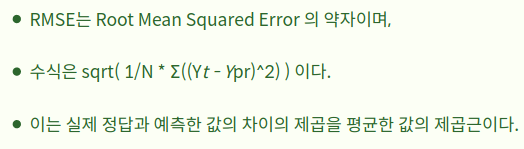

### 2) 베이스 라인
- 문제 해결을 시작할 때 쉽게 사용해볼 수 있는 샘플
보통 대회에서 Baseline은 제공이 되는 경우도, 아닌 경우도 있는데 이번 대회는 특히 교육적인 성격도 있어서 제공됨.
[베이스 라인](https://www.kaggle.com/kcs93023/2019-ml-month-2nd-baseline)

### 3) 블렌딩(blending)
- 여러 가지 모델을 종합해 결과를 얻는 기법

### 4) 앙상블(Ensemble)
- 여러 개의 학습 알고리즘을 사용하고, 그 예측을 결합함으로써 보다 정확한 최종 예측을 도출하는 기법
- 하나의 강한 머신러닝 알고리즘보다 여러 개의 약한 머신러닝 알고리즘이 낫다 라는 아이디어에서 출발.

#### 보팅(Voting)은 분류
#### 에버리징(Averaging)은 회귀

### 5) 파라미터, 하이퍼 파라미터
- 파라미터는 머신러닝이 학습을 진행하면서 손실함수의 값을 최소로 하기 위해 스스로 조절하는 변수이며
- 하이퍼 파라미터는 사람이 직접 조정하면서 최적의 가중치를 찾는 변수이다.

### 6) 앙상블 기법
> [출처](https://subinium.github.io/introduction-to-ensemble-1/#:~:text=%EC%95%99%EC%83%81%EB%B8%94(Ensemble)%20%ED%95%99%EC%8A%B5%EC%9D%80%20%EC%97%AC%EB%9F%AC,%EB%A5%BC%20%EA%B0%80%EC%A7%80%EA%B3%A0%20%EC%9D%B4%ED%95%B4%ED%95%98%EB%A9%B4%20%EC%A2%8B%EC%8A%B5%EB%8B%88%EB%8B%A4.)  

**여러 개의 학습 알고리즘을 사용하고, 그 예측을 결합함으로써 보다 정확한 최종 예측을 도출하는 기법**
- 앙상블 학습 유형: Voting, Bagging, Boosting, Stacking 등

#### 6-1) Voting
- 분류 문제에서 사용
1. 일정 수의 base model과 predict를 만든다.
  - 훈련 데이터를 나누어 같은 알고리즘 사용하거나
  - 훈련 데이터는 같지만 다른 알고리즘 사용하거나
  - 등등의 방법 사용
2. 다양한 방법으로 Voting 실시

#### 6-1-1) Majority Voting (Hard Voting)
- 각 모델은 test 데이터셋(또는 인스턴스)의 결과를 예측합니다. 그리고 예측값들의 다수결로 예측값을 정합니다.
- 이진 분류에 있어서는 과반수 이상이 선택한 예측값을 최종 예측으로 선택하는 것입니다.  
이런 다수결의 성격때문에 **max voting**, plurality voting 라고도 부릅니다.

#### 6-1-2) Weighted Voting (Soft Voting)
- 이번에는 test 데이터셋(또는 인스턴스)의 결과 가능성을 예측합니다. 그리고 이 가능성(가중치)를 특정 연산을 하여 분류 label의 확률값을 계산합니다.
- 이 방법에서 가중치의 연산은 원하는 방식으로 할 수 있고, 보통 평균을 사용합니다.  
보통 Majority Voting보다 유연한 결과를 얻을 수 있으며, 예측 성능이 좋아 더 많이 사용합니다.

#### 6-2) Averaging
- 회귀 문제에서 사용

##### 6-2-1) Simple Averaging
- 회귀 문제에서 사용하는 방법으로, 각 예측값을 평균내어 사용합니다. 이 방법은 경우에 따라 과대적합을 줄여주고, 더 부드러운 회귀모델을 만들어줍니다.

##### 6-2-2) Weighted Averaging
- 위에서 평균을 낼 때, 각 모델별 가중치를 두어 평균내는 방식입니다.

### 7) 배깅(bagging)
- Bootstrap Aggregating의 약자
- 배깅의 핵심은 평균을 통해 분산(variance)값을 줄여 모델을 더 일반화시킨다는 점
❗배깅에서 최종적으로 보팅을 사용❗
1. 일정 수의 base model을 만듭니다.
2. 모델들의 알고리즘은 모두 같습니다.
3. 각각의 모델은 훈련데이터셋에서 랜덤으로 만든 서브 데이터셋을 각각 사용합니다.  
3에서 서브 데이터셋을 만드는 과정: **부트스트래핑(bootstraping)** (각 서브데이터셋은 중첩가능)
-> 데이터 생성과 훈련이 개별 모델에서 진행되므로, 병렬 연산이 가능

#### 7-1) Bagging meta-estimator
- 랜덤 포레스트의 모체가 되는 알고리즘입니다. 위에서 언급한 방식을 그대로 사용하는 알고리즘

#### 7-2) Random Forest
- 여러 결정 트리(Decision Tree) 를 사용하여 보팅(soft voting)을 통해 예측을 결정하는 것
- Bagging meta-estimator과 다르게 결정트리만 사용하고, 특성(feature)을 랜덤으로 선택하여 Bagging을 진행  
결정 트리의 경우, 쉽고 직관적인 성격때문에 다른 앙상블 알고리즘에서도 많이 채택    
❗**장점: 앙상블 알고리즘 중 비교적 빠른 속도를 가지고 있으며, 다양한 분야에서 좋은 성능을 낸다는 점에서 매우 장점이 많은 알고리즘**❗  

❗**단점: 하이퍼파라미터가 많아 튜닝을 위한 시간이 많이 소모된다는 것, 하이퍼파라미터의 조정을 통한 성능의 향상이 비교적 미비**  

### 8) Boosting
- 여러 개의 약한 학습기(weak learner)를 순차적으로 학습-예측하며 잘못 예측한 데이터에 가중치 부여를 통해 오류를 개선해 나가면서 학습하는 방식
계속해서 분류기에게 가중치를 부스팅하면서 학습을 진행하기에 부스팅 방식으로 불립니다.  

❗**단점: 순차적인 연산이 필수적이므로 병렬 연산이 불가능, 대용량 데이터셋에서는 학습 시간이 매우 많이 필요**  
(참고) 최근 성능면에서 인정을 받아 **가장 많이 사용**하는 부스팅 계열 알고리즘으로 `XGBoost` 와 `LightGBM` 이 있습니다.  

#### 8-1) AdaBoost(에이다 부스트)
- Adaptive boosting의 약자로 **오류 데이터에 가중치를 부여**하며 부스팅을 수행하는 대표적인 알고리즘  
❗메인 아이디어는 잘못 분류한 데이터에 가중치를 부여하여, 다음 분류기는 이를 더 잘 분류하게 만드는 것❗  
 단점: 오류 데이터에 가중치를 부여하기 때문에 이상치(outlier)에 민감  

#### 8-2) Gradient Boost(그래디언트 부스트)
- 가중치 업데이트를 **경사하강법(Gradient Descent)** 진행 (AdaBoost와 비슷)  
**단점: 평균적으로 랜덤 포레스트보다 좋은 예측 성능을 가지지만, 하이퍼파라미터 튜닝 노력이 필요하고 그만큼 수행 시간이 오래걸림**  
**순차적인 진행때문에 병렬 수행이 불가능**
(참고) XGBoost, LightGBM의 기본 아이디어가 된다. --> 잘 사용하지 않음

#### 8-3) XGBoost(eXtra Gradient Boost)
- 장점:GBM에 비해 빠르고, 과적합 규제 등의 장점
- 분류/회귀 모두 예측 성능이 우수하고, 자체 내장 교차 검증, 결손값 처리 등의 장점
- 병렬 CPU를 이용하여 GBM보다 빠른 수행 --> 속도를 기대하려면 multi-CPU core가 필요
- 단점: GBM보다는 빠르지만 여전히 느린 알고리즘입니다. 심지어 GridSearchCV를 이용하여 하이퍼파라미터 튜닝을 수행하면 시간이 너무 오래 걸림

#### 8-4) LightGBM  
- Light한 GBM  
- XGBoost에 비해 훨씬 빠르며, 메모리 사용량도 상대적으로 적다  
- 예측 성능 자체도 큰 차이는 없다.  
**단점: 적은 수(1만 건 이하)의 데이터셋에는 과대적합이 발생하기 쉽다는 단점**  
⭐메인 아이디어  
- GBM 계열의 트리 분할 방법에서 트리 균형 맞추는 과정을 생략하며 성능을 높였다는 점  
- 대부분의 트리 기반 알고리즘은 트리의 깊이를 효과적으로 줄이기 위해 균형 트리 분할(Level Wise) 방식을 사용합니다.  
- 균형 잡힌 트리는 과대적합에 강하지만 시간 비용이 크다.  
 **빠르고 높은 성능의 이유: 리프 중심 트리 분할(Leaf Wise) 방식을 사용해 비대칭이지만 예측 오류 손실 값을 줄이는 방식을 선택하여 트리를 분할**
 
#### 8-5) CatBoost
- 범주형 변수를 위해 만든 Boosting 알고리즘  
- 범주형 변수를 자동으로 처리하기 위해 만든 알고리즘  
(참고) - 범주형 변수의 경우에는 원-핫 인코딩을 할 경우에 많은 수의 특성이 생기기에 부스팅 알고리즘을 사용하는 경우, 매우 오랜 시간이 걸림


### 9) Stacking & Blending
#### 9-1) Stacking
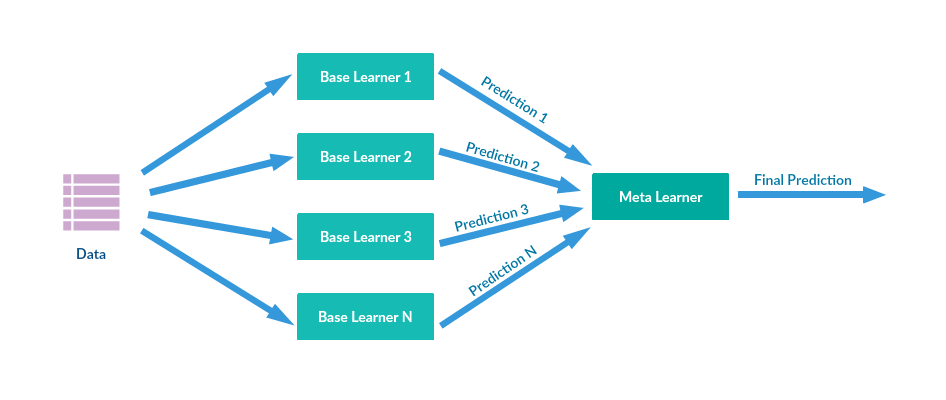
> 출처 : http://supunsetunga.blogspot.com/  

**머신러닝 알고리즘으로 훈련 데이터셋을 통해 새로운 데이터셋을 만들고, 이를 데이터셋으로 사용하여 다시 머신러닝 알고리즘을 돌리는 것입니다. 보통은 서로 다른 타입의 모델들을 결합**    
1. 개별적인 기반 모델 : 성능이 비슷한 여러 개의 모델
2. 최종 메타 모델 : 기반 모델이 만든 예측 데이터를 학습 데이터로 사용할 최종 모델
**즉, 여러 개의 개별 모델들이 생성한 예측 데이터 --> 최종 메타 모델이 학습할 별도의 학습 데이터 세트와 예측할 테스트 데이터 세트를 재 생성하는 기법**  

#### 9-2) Blending
- 스태킹과 매우 유사  
 **차이점: Stacking에서는 cross-fold-validation을 사용하고, Blending은 holdout validation을 사용**  
 그렇기 때문에 Blending의 결과는 holdout set에 과대적합이 된 결과를 얻을 가능성이 높다

### 10) Grid Search VS Random Search
**하이퍼파라미터 최적화 방법 중 하나**  
(다른 방법): Manual Search, Grid Search, Random Search, Bayesian Search  
- Random Search가 여러가지 면에서 유리합니다. 먼저 Random Search는 중요한 hyper-parameter를 더 많이 탐색
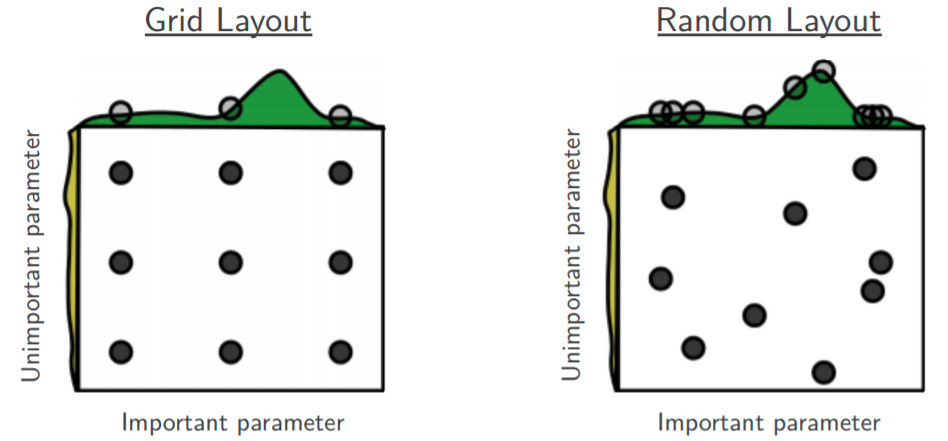
  
#### Grid Search: 중요한 hyper-parameter의 3개 지점을 탐색
- Grid Search는 중요하지 않은 hyper-parameter를 너무 많이 탐색
- 탐색을 중단하면 hyper-parameter의 일부 범위를 제외하고 탐색  

#### Random Search: 9개 지점을 탐색
- 중요한 parameter를 더 많이 탐색할 수 있기 때문에 최적화하기에 유리
- 언제든지 탐색을 중단할 수 있습니다. 중간에 멈추더라도 특정 범위에 편중된 탐색이 아니기 때문

**Grid Search가 Random Search와 같은 결과를 내기 위해서는 꽤 많은 횟수동안 수행해야 한다**  
❗그러나, 여전히 Grid Search는 많이 쓰이고 guideline을 개선하는 방식으로 사용❗  

#### 대중적인 지침
1. 경험적으로 중요한 hyper-parameter를 먼저 탐색하고 값을 고정합니다.
2. 덜 중요한 hyper-parameter를 나중에 탐색합니다.
3. 먼저 넓은 범위에 대해 hyper-parameter를 탐색하고 좋은 결과가 나온 범위에서 다시 탐색합니다.

**필요한 라이브러리 설치**

$ conda install -c conda-forge xgboost  

$ conda install -c conda-forge lightgbm  

$ conda install -c conda-forge missingno  

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

# 필요 라이브러리 설치 from 베이스라인 모델 ipynb
import warnings # 캐글에서 무시를 위한 패키지
warnings.filterwarnings("ignore")

import os
from os.path import join

import pandas as pd
import numpy as np

import missingno as msno

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import KFold, cross_val_score
import xgboost as xgb
import lightgbm as lgb

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor

from sklearn.model_selection import GridSearchCV

print('완료')

완료


***

## 1. 데이터 불러오기, 살펴보기

## 1-1. 데이터 불러오기

> $ wget https://aiffelstaticprd.blob.core.windows.net/media/documents/kaggle-kakr-housing-data.zip

## 1-2. 데이터 요약(캐글 사이트)
- 부동산 데이터  


\<Data Fields>
1. ID : 집을 구분하는 번호
2. date : 집을 구매한 날짜
3. price : 집의 가격(Target variable)
4. bedrooms : 침실의 수
5. bathrooms : 화장실의 수
6. sqft_living : 주거 공간의 평방 피트(면적)
7. sqft_lot : 부지의 평방 피트(면적)
8. floors : 집의 층 수
9. waterfront : 집의 전방에 강이 흐르는지 유무 (a.k.a. 리버뷰)
10. view : 집이 얼마나 좋아 보이는지의 정도
11. condition : 집의 전반적인 상태
12. grade : King County grading 시스템 기준으로 매긴 집의 등급
13. sqft_above : 지하실을 제외한 평방 피트(면적)
14. sqft_basement : 지하실의 평방 피트(면적)
15. yr_built : 지어진 년도
16. yr_renovated : 집을 재건축한 년도
17. zipcode : 우편번호
18. lat : 위도
19. long : 경도
20. sqft_living15 : 2015년 기준 주거 공간의 평방 피트(면적, 집을 재건축했다면, 변화가 있을 수 있음)
21. sqft_lot15 : 2015년 기준 부지의 평방 피트(면적, 집을 재건축했다면, 변화가 있을 수 있음)

\<File 종류>
1. `train.csv` - 모델 학습용 파일
2. `test.csv` - 테스트용 파일
3. `sample_submission.csv` - 제출용 파일  
\> **`train`으로 학습을 진행, `test` 데이터에 대해 `Price`를 예측, sample_submission형식에 맞는 형태로 캐글 제출**

## 1-3. 데이터 살펴보기

In [2]:
import os
from os.path import join
import pandas as pd

In [3]:
data_dir = os.getenv('HOME')+'/1.AIFFEL_Study/Exploration/E09_My_First_Kaggle/data'

train_data_path = join(data_dir, 'train.csv')
test_data_path = join(data_dir, 'test.csv')
sample_submission_data_path = join(data_dir,'sample_submission.csv')

train = pd.read_csv(train_data_path)
test = pd.read_csv(test_data_path)
sample_submission = pd.read_csv(sample_submission_data_path)

print('train data dim : {}'.format(train.shape)) # 훈련 데이터 형태
print('sub data dim : {}'.format(test.shape))    # 시험 데이터 형태
print('submission dim : {}'.format(sample_submission.shape)) # 제출 샘플 데이터 형태

train data dim : (15035, 21)
sub data dim : (6468, 20)
submission dim : (6468, 2)


\>> **train 데이터 개수: 15,035개, 열은 21개**  
\>> **test 데이터 개수: 6,468개, 열 20개 (학습한 결과로 test의 price를 예측해야함)**  
\>> **제출할 submission에는 열 2개**

### train.csv

In [4]:
train.head() # 위에서 확인한 columns값 21개 확인

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,1,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
2,2,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
3,3,20140627T000000,257500.0,3,2.25,1715,6819,2.0,0,0,...,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
4,4,20150115T000000,291850.0,3,1.50,1060,9711,1.0,0,0,...,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711


### test.csv

In [5]:
test.head() # 열은 train과 동일

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,15035,20141209T000000,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
1,15036,20141209T000000,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
2,15037,20140512T000000,4,4.50,5420,101930,1.0,0,0,3,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
3,15038,20150415T000000,3,1.00,1780,7470,1.0,0,0,3,7,1050,730,1960,0,98146,47.5123,-122.337,1780,8113
4,15039,20150312T000000,3,2.50,1890,6560,2.0,0,0,3,7,1890,0,2003,0,98038,47.3684,-122.031,2390,7570


### sample_submission.csv

In [6]:
sample_submission.head()

,id,price
0,15035,100000
1,15036,100000
2,15037,100000
3,15038,100000
4,15039,100000


\>> **<span style="color:red">`test data`에는 `train data`에 있는 `price`가 없다. 학습 후 예측해야하기 때문</span>**  
\>> **`train`, `test`: `date`는 날짜를 뜻하는데 너무 길다. 0번부터 5번까지만 슬라이싱 필요**

***

# 2. 전처리

## 2-1. 결측치 찾기 및 제거
- missingno 라이브러리 사용: 하얗게 나오면 결측치

### train 데이터 결측치 찾기

<AxesSubplot:>

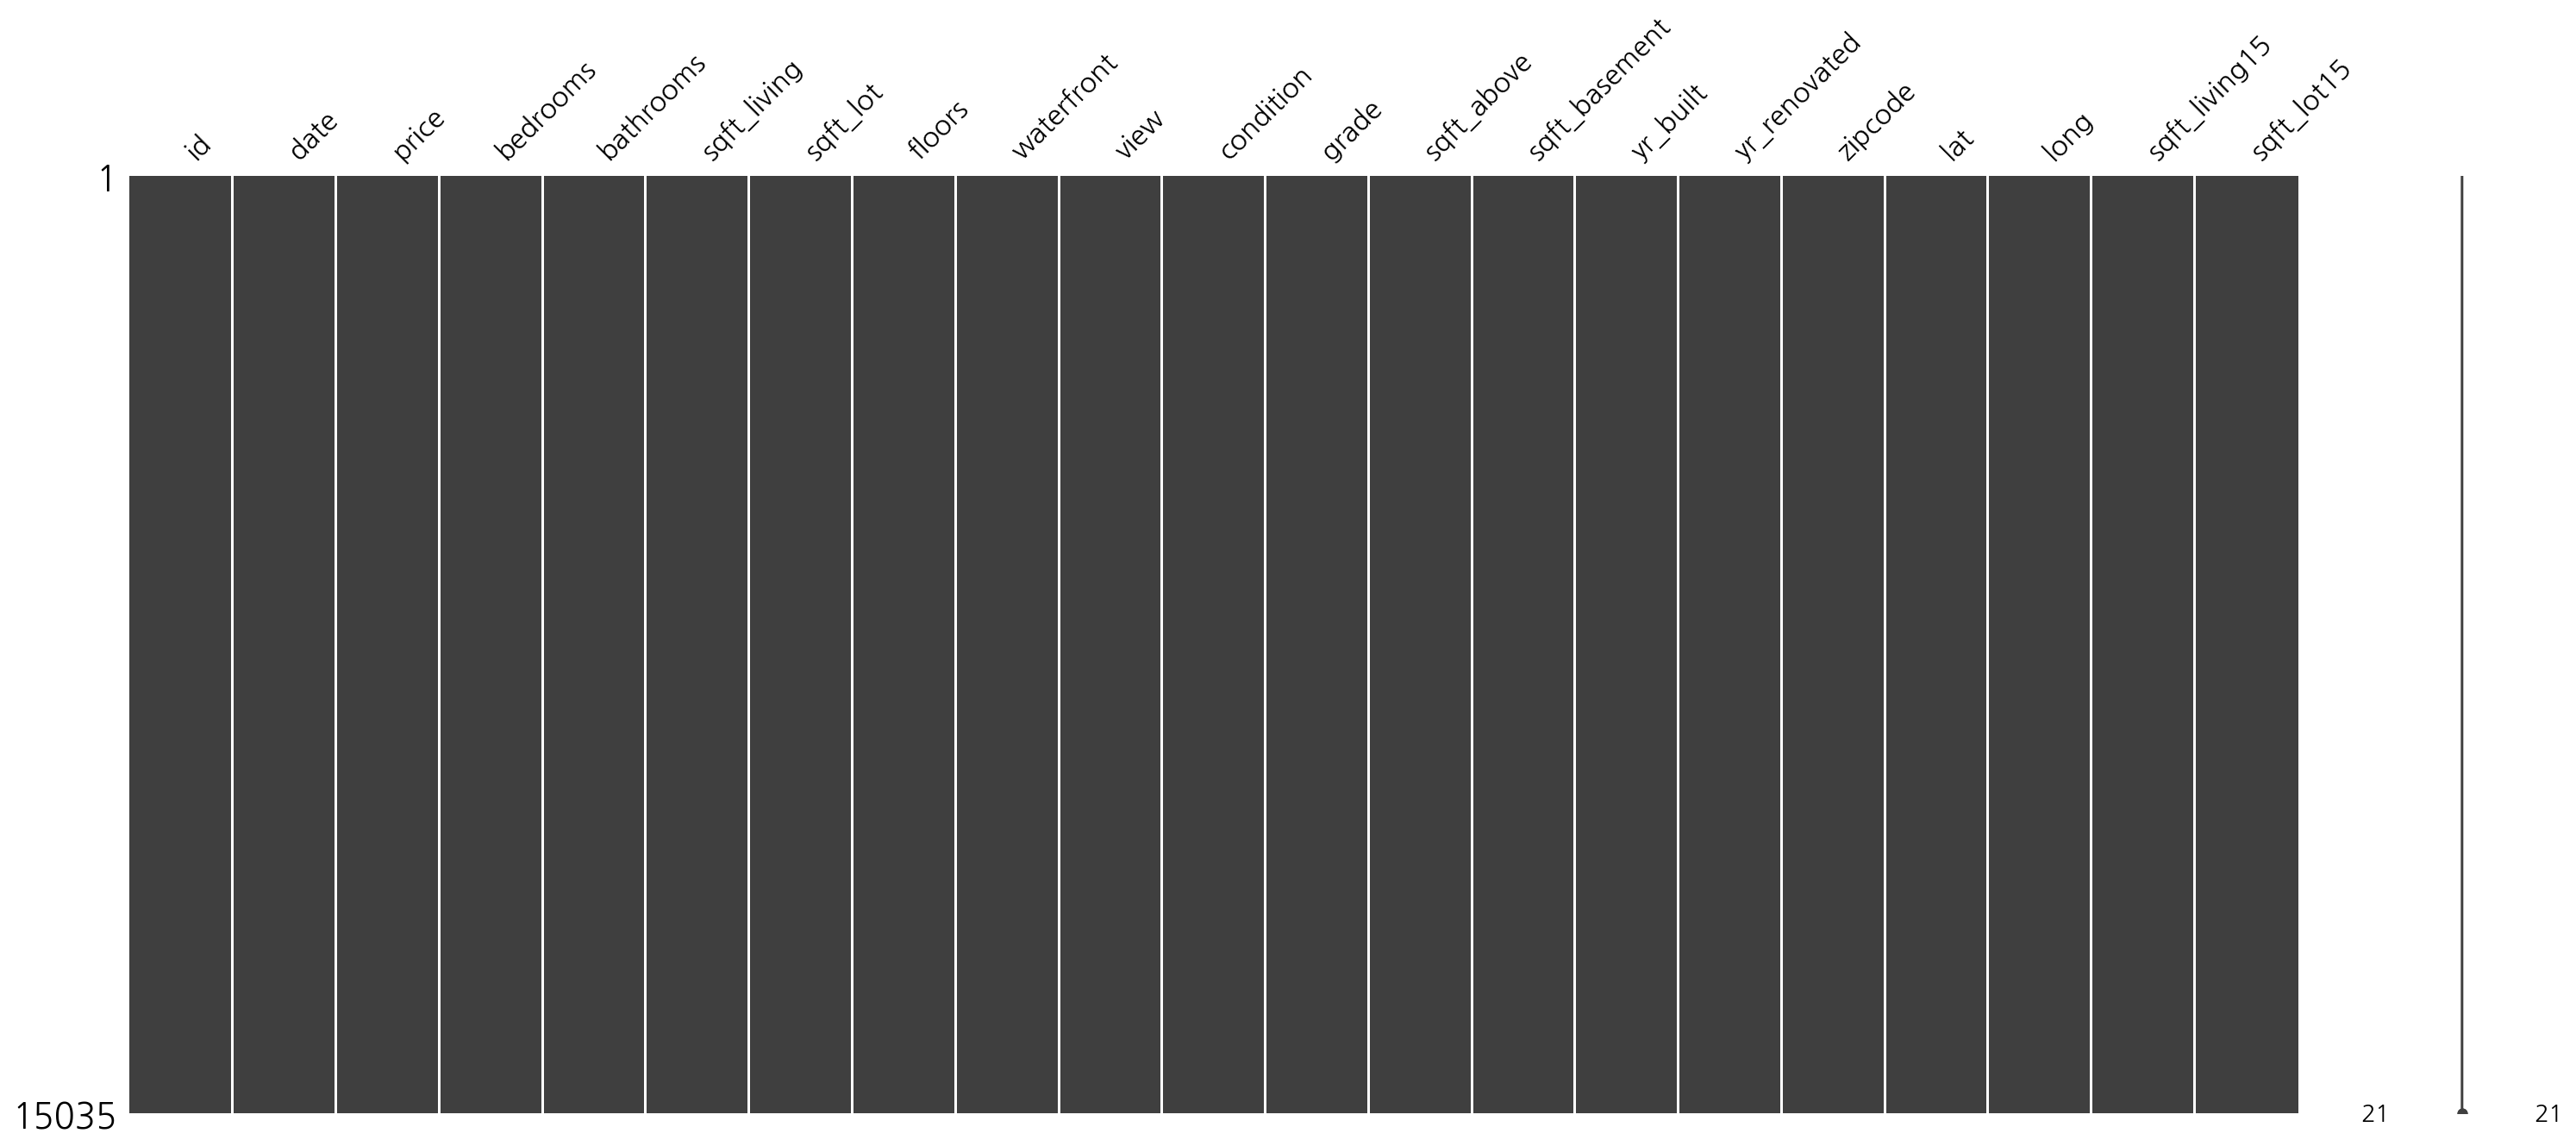

In [7]:
msno.matrix(train)

### test 데이터 결측치 찾기

<AxesSubplot:>

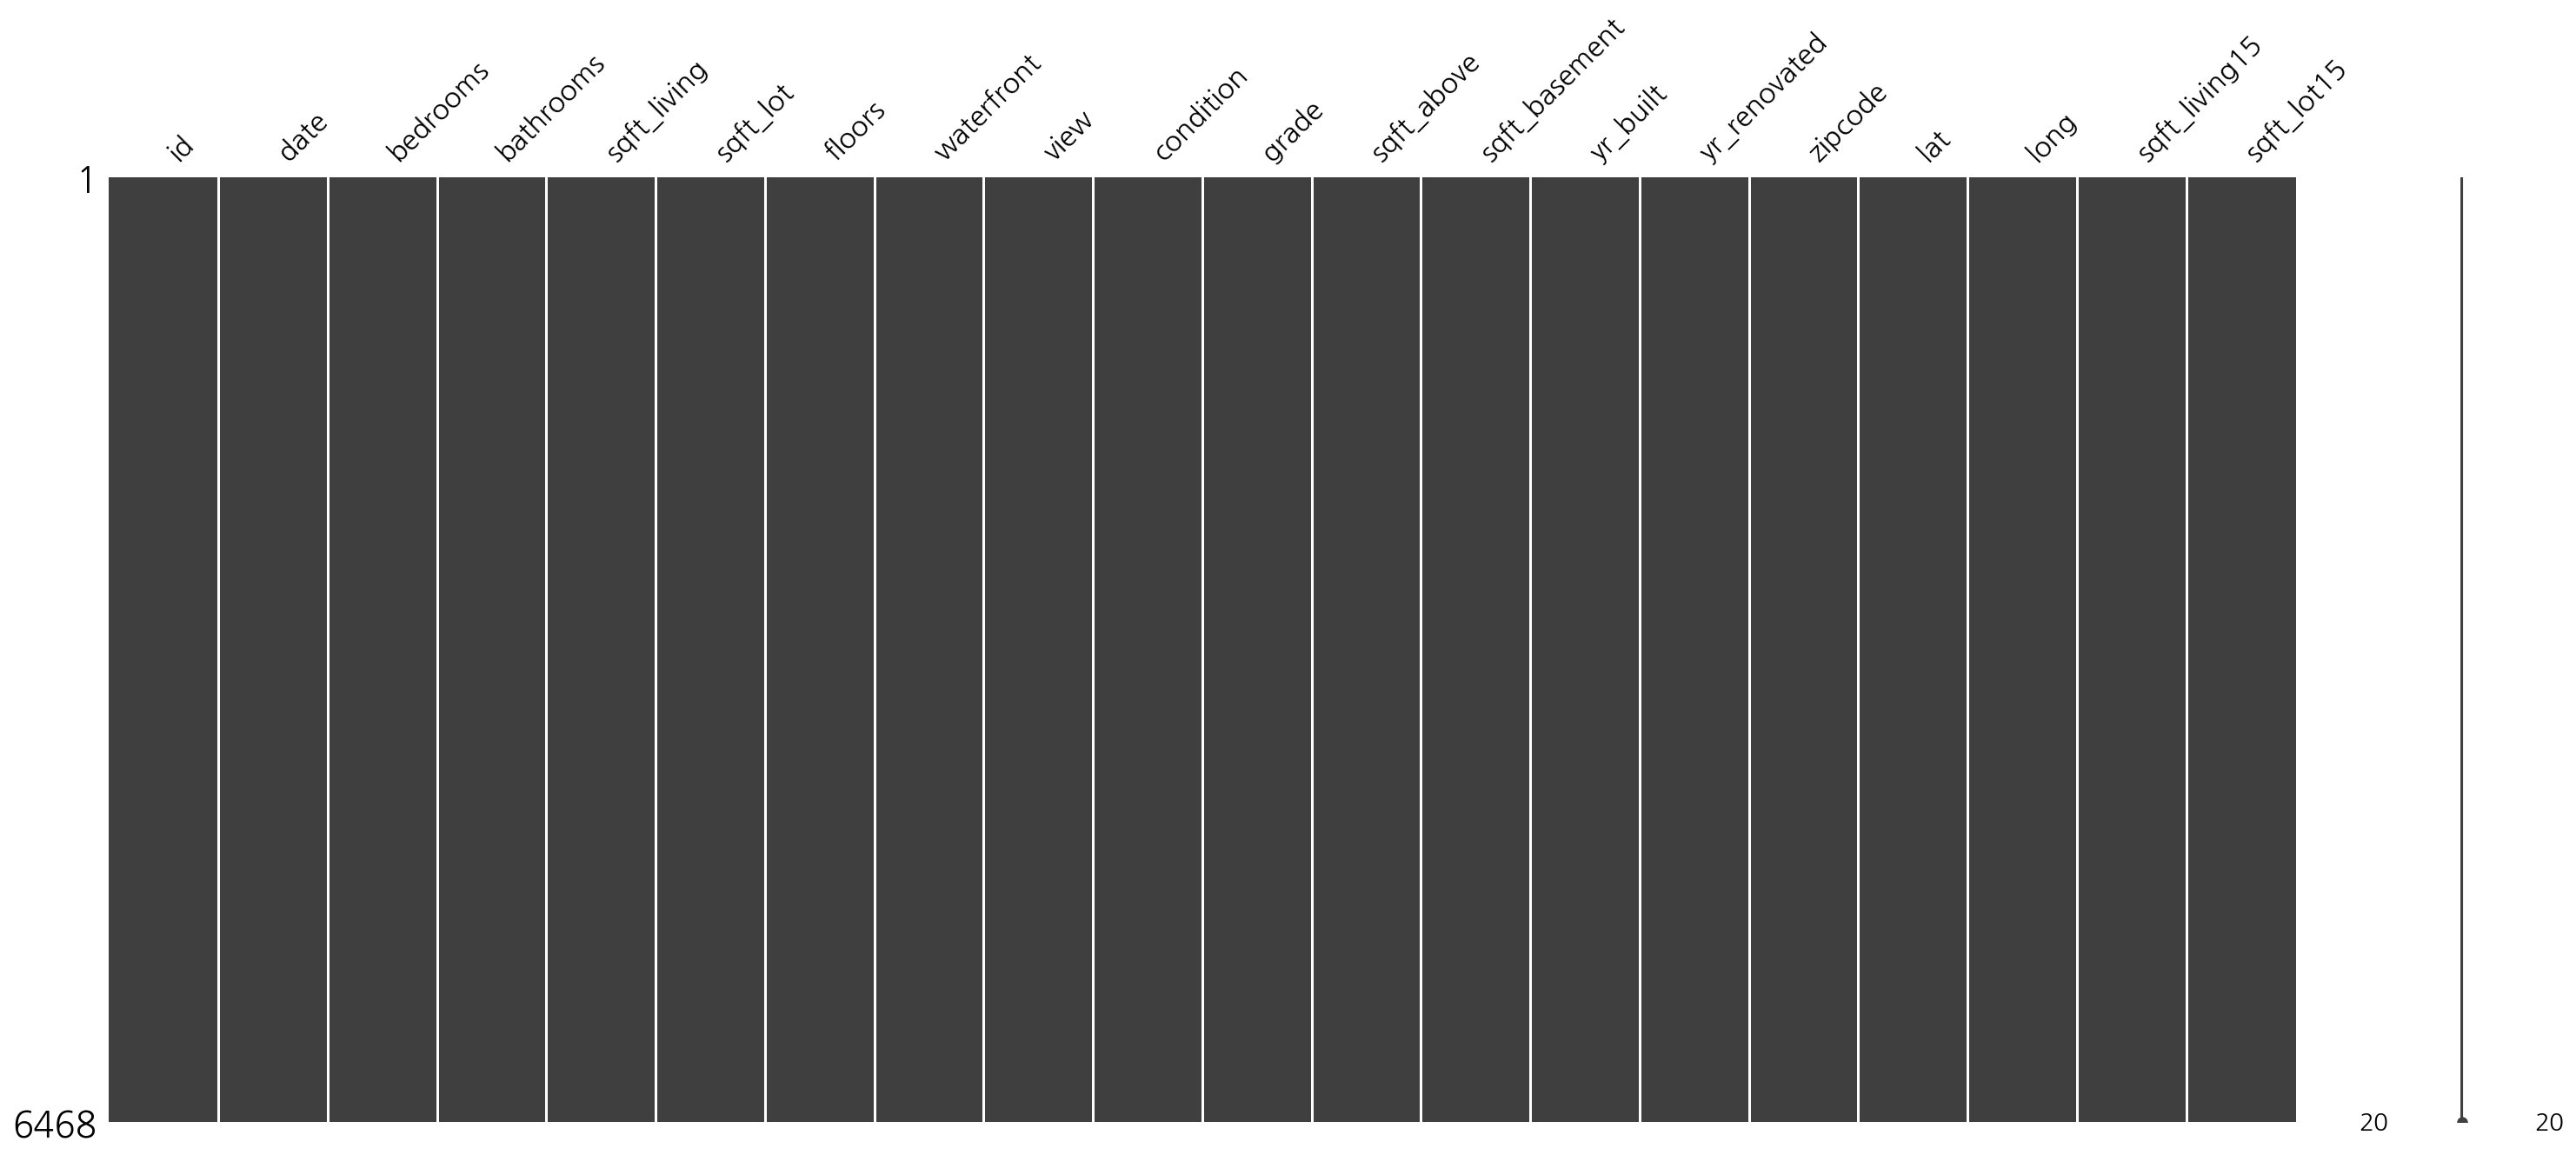

In [8]:
msno.matrix(test)

### train, test 결측치 개수 파악하기

In [9]:
for c in train.columns:
    print('{} : {}'.format(c, len(train.loc[pd.isnull(train[c]), c].values)))
    
print('------------------------------------------------------------------')
for c in test.columns:
    print('{} : {}'.format(c, len(test.loc[pd.isnull(test[c]), c].values)))    

id : 0
date : 0
price : 0
bedrooms : 0
bathrooms : 0
sqft_living : 0
sqft_lot : 0
floors : 0
waterfront : 0
view : 0
condition : 0
grade : 0
sqft_above : 0
sqft_basement : 0
yr_built : 0
yr_renovated : 0
zipcode : 0
lat : 0
long : 0
sqft_living15 : 0
sqft_lot15 : 0
------------------------------------------------------------------
id : 0
date : 0
bedrooms : 0
bathrooms : 0
sqft_living : 0
sqft_lot : 0
floors : 0
waterfront : 0
view : 0
condition : 0
grade : 0
sqft_above : 0
sqft_basement : 0
yr_built : 0
yr_renovated : 0
zipcode : 0
lat : 0
long : 0
sqft_living15 : 0
sqft_lot15 : 0


\>> **결측치 찾기: 결측치 없음**

## 2-2. date 컬럼 변환
- `앞 6자리`만 사용하며 데이터 타입을 `정수`로 변경

In [10]:
train['date'] = train['date'].apply(lambda i: i[:6]).astype(int)
train.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,201410,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,1,201502,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
2,2,201502,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
3,3,201406,257500.0,3,2.25,1715,6819,2.0,0,0,...,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
4,4,201501,291850.0,3,1.50,1060,9711,1.0,0,0,...,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711


**`price`값을 `y`라는 변수에 담고 `train`에서 삭제**  
**`train`에서 `id`컬럼 삭제**

In [11]:
y = train['price']
del train['price']
del train['id']
print(train.columns) # id, price 삭제됨

Index(['date', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')


**`test`에서 `앞 6자리`만 사용하며 데이터 타입을 `정수`로 변경**  
**`sub_id`에 `test`의 `id` 저장 후**  
**`test`에서 `id`컬럼 삭제**

In [12]:
test['date'] = test['date'].apply(lambda i: i[:6]).astype(int)
sub_id = test['id']
del test['id']

print(test.columns) # id 삭제

Index(['date', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')


**`y`의 분포 확인**

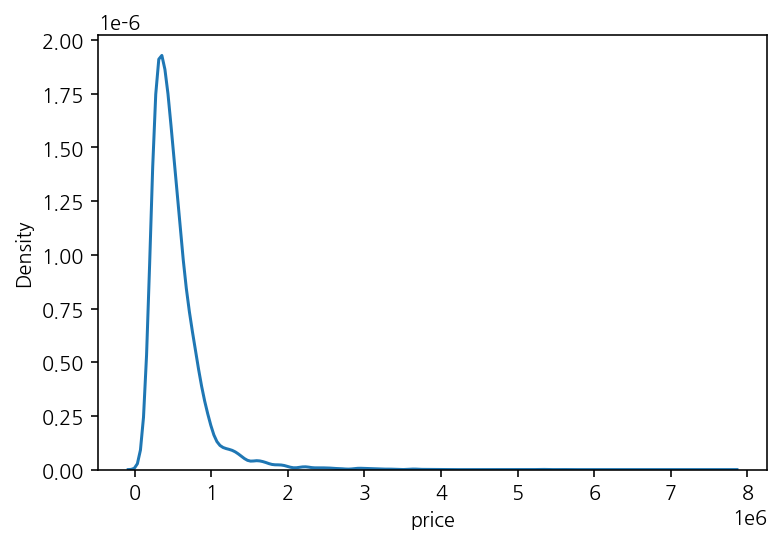

In [13]:
sns.kdeplot(y)
plt.show()

**`y`의 분포 로그 변환**

**❗잠깐❗**  
로그 변환을 하는 이유  
아래 그래프를 보면  
`0 < x < 1` 범위에서 `y`는 `-∞ ~ 0` 범위를 가진다.  
1. x: 0에 가깝게 모여있는 값들이 입력되면 
2. y: 매우 큰 범위로 벌어지게 된다.
3. 반대로 x가 커질수록 y는 작은 범위로 퍼지게 된다.
4. 즉, 큰 x값들에 대해서 y값이 크게 차이나지 않는다 -> **넓은 범위를 가지는 x를 비교적 작은 y값의 구간 내에 모이게 하는 특징**

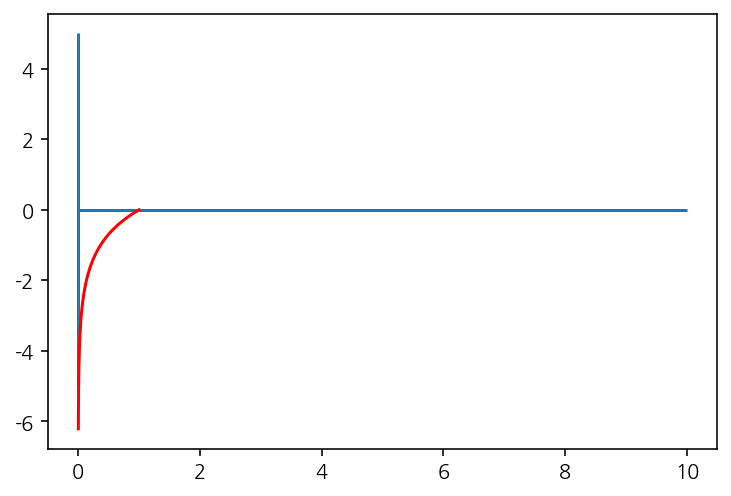

In [14]:
xx = np.linspace(0, 1, 500)
yy = np.log(xx)

plt.hlines(0, 0, 10)
plt.vlines(0, -5, 5)
plt.plot(xx, yy, c='r')
plt.show()

In [15]:
# y log분포
y = np.log1p(y)
y

0        12.309987
1        12.100718
2        13.142168
3        12.458779
4        12.583999
           ...    
15030    13.322338
15031    13.822984
15032    12.793862
15033    12.899222
15034    12.691584
Name: price, Length: 15035, dtype: float64

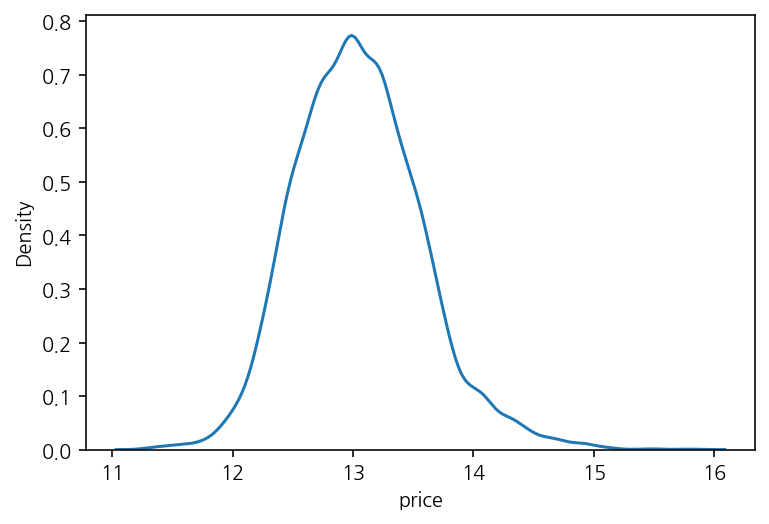

In [16]:
sns.kdeplot(y)
plt.show()

**>> 비교적 완만한 정규분포의 형태로 잘 변환**  
**`info()`함수로 전체 데이터 확인**
### 모든 데이터 타입이 int64 또는 float64 --> 학습 진행 가능!

In [17]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15035 entries, 0 to 15034
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           15035 non-null  int64  
 1   bedrooms       15035 non-null  int64  
 2   bathrooms      15035 non-null  float64
 3   sqft_living    15035 non-null  int64  
 4   sqft_lot       15035 non-null  int64  
 5   floors         15035 non-null  float64
 6   waterfront     15035 non-null  int64  
 7   view           15035 non-null  int64  
 8   condition      15035 non-null  int64  
 9   grade          15035 non-null  int64  
 10  sqft_above     15035 non-null  int64  
 11  sqft_basement  15035 non-null  int64  
 12  yr_built       15035 non-null  int64  
 13  yr_renovated   15035 non-null  int64  
 14  zipcode        15035 non-null  int64  
 15  lat            15035 non-null  float64
 16  long           15035 non-null  float64
 17  sqft_living15  15035 non-null  int64  
 18  sqft_l

# 3. 모델링 (1) - Average Blending(from baseline)

## 3-1. Average Blending
- 여러 가지 모델의 결과를 산술평균하여 블렌딩 모델

In [18]:
gboost = GradientBoostingRegressor(random_state=2019)
xgboost = xgb.XGBRegressor(random_state=2019)
lightgbm = lgb.LGBMRegressor(random_state=2019)

models = [{'model':gboost, 'name':'GradientBoosting'}, {'model':xgboost, 'name':'XGBoost'},
          {'model':lightgbm, 'name':'LightGBM'}]

print('얍💢')

얍💢


## 3-2. Cross Validation
- 교차 검증을 통해 모델의 성능을 간단히 평가

In [19]:
def get_cv_score(models):
    kfold = KFold(n_splits=5, random_state=2019).get_n_splits(train.values)
    for m in models:
        print("Model {} CV score : {:.4f}".format(m['name'], np.mean(cross_val_score(m['model'], train.values, y)), 
                                                  kf=kfold))
print('Cross Validation 함수 작성완료!')

Cross Validation 함수 작성완료!


In [20]:
get_cv_score(models)

Model GradientBoosting CV score : 0.8796
Model XGBoost CV score : 0.8973
Model LightGBM CV score : 0.9025


### >> LigthGBM 선택!(cv_score 가장 높다)

## 3-3.  Make Submission File
회귀 모델의 경우에는 cross_val_score 함수가 R<sup>2</sup>를 반환합니다.<br>
R<sup>2</sup> 값이 1에 가까울수록 모델이 데이터를 잘 표현함을 나타냅니다. 3개 트리 모델이 상당히 훈련 데이터에 대해 괜찮은 성능을 보여주고 있습니다.<br> 훈련 데이터셋으로 3개 모델을 학습시키고, Average Blending을 통해 제출 결과를 만들겠습니다.

In [21]:
def AveragingBlending(models, x, y, sub_x):
    for m in models : 
        m['model'].fit(x.values, y)
    
    predictions = np.column_stack([
        m['model'].predict(sub_x.values) for m in models
    ])
    return np.mean(predictions, axis=1)

print('AveragingBlending 함수 작성 완료')

AveragingBlending 함수 작성 완료


### 예측값 생성

In [22]:
y_pred = AveragingBlending(models, train, y, test)
print(len(y_pred))
y_pred

6468


array([13.14462881, 12.98192758, 14.08443622, ..., 13.02622152,
       12.72060737, 12.98918701])

### 캐글에 제출하기 위해 sample_submission.csv 생성

In [23]:
data_dir = os.getenv('HOME')+'/aiffel/kaggle_kakr_housing/data'

submission_path = join(data_dir, 'sample_submission.csv')
submission = pd.read_csv(submission_path)
submission.head()

,id,price
0,15035,100000
1,15036,100000
2,15037,100000
3,15038,100000
4,15039,100000


In [24]:
result = pd.DataFrame({
    'id' : sub_id, 
    'price' : y_pred
})

result.head()

,id,price
0,15035,13.144629
1,15036,12.981928
2,15037,14.084436
3,15038,12.644482
4,15039,12.671252


In [25]:
my_data_dir = os.getenv('HOME') + '/1.AIFFEL_Study/Exploration/E09_My_First_Kaggle/data'
my_submission_path = join(my_data_dir, 'submission.csv')
result.to_csv(my_submission_path, index=False)

print(my_submission_path)

/home/aiffel-dj40/1.AIFFEL_Study/Exploration/E09_My_First_Kaggle/data/submission.csv


## 3-4. 캐글 제출 결과

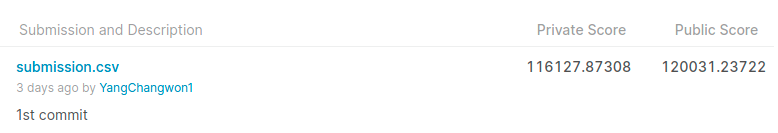

### Average Blending 결과
- ### Private Score: 116,127.87308
- ### Public Score: 120,031.23722

***

# 4. 모델링 (2) - Boosting  with GridSearch

### RMSE측정을 위한 함수 작성
- y_test나 y_pred는 np.log1p()로 변환되어 있음 --> np.expm1()이용해 원래 데이터 단위에 맞게 변환
- 마지막으로 np.sqrt를 취해주면 RMSE 값 획득!

In [ ]:
def rmse(y_test, y_pred):
    return np.sqrt(mean_squared_error(np.expm1(y_test), np.expm1(y_pred)))

print('RMSE 함수 작성 완료')

#### (참고) 각 모델의 이름은 다음과 같이 클래스의 __name__ 속성에 접근해서 얻을 수 있습니다.

In [ ]:
gboost.__class__.__name__

### 각 알고리즘별로 평가 점수를 알 수 있는 get_scores함수 작성

In [ ]:
def get_scores(models, train, y):
    df = {}

    for model in models:
        # 모델 이름 획득
        model_name = model.__class__.__name__

        # train, test 데이터셋 분리 - 여기에도 random_state를 고정합니다. 
        X_train, X_test, y_train, y_test = train_test_split(train, y, random_state=random_state, test_size=0.2)

        # 모델 학습
        model.fit(X_train, y_train)

        # 예측
        y_pred = model.predict(X_test)

        # 예측 결과의 rmse값 저장
        df[model_name] = rmse(y_test, y_pred)

        # data frame에 저장
        score_df = pd.DataFrame(df, index=['RMSE']).T.sort_values('RMSE', ascending=False)
  
    return score_df

### 모델 정의

In [ ]:
random_state=2020

gboost = GradientBoostingRegressor(random_state=random_state)
xgboost = XGBRegressor(random_state=random_state)
lightgbm = LGBMRegressor(random_state=random_state)
rdforest = RandomForestRegressor(random_state=random_state)

models = [gboost, xgboost, lightgbm, rdforest]

print('모델 정의')

### Grid Search방법을 통해 하이퍼파라미터를 탐색할 수 있는 my_GridSearch함수 작성

In [ ]:
"""
다음과 같은 과정을 진행할 수 있는 `my_GridSearch(model, train, y, param_grid, verbose=2, n_jobs=5)` 함수를 구현해 보세요.

1. GridSearchCV 모델로 `model`을 초기화합니다.
2. 모델을 fitting 합니다.
3. params, score에 각 조합에 대한 결과를 저장합니다. 
4. 데이터 프레임을 생성하고, RMSLE 값을 추가한 후 점수가 높은 순서로 정렬한 `results`를 반환합니다.
"""

# 코드 입력
def my_GridSearch(model, train, y, param_grid, verbose=2, n_jobs=5):
    # GridSearchCV 모델로 초기화
    grid_model = GridSearchCV(model, param_grid=param_grid, scoring='neg_mean_squared_error', \
                              cv=5, verbose=verbose, n_jobs=n_jobs)

    # 모델 fitting
    grid_model.fit(train, y)

    # 결과값 저장
    params = grid_model.cv_results_['params']
    score = grid_model.cv_results_['mean_test_score']

    # 데이터 프레임 생성
    results = pd.DataFrame(params)
    results['score'] = score

    # RMSLE 값 계산 후 정렬
    results['RMSLE'] = np.sqrt(-1 * results['score'])
    results = results.sort_values('RMSLE')

    return results

### LightGBM(lgbm) 모델 사용
### GridSearch 실행

In [ ]:
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [1, 10],
}

model = LGBMRegressor(random_state=random_state)
my_GridSearch(model, train, y, param_grid, verbose=2, n_jobs=5)

### 캐글 제출용 csv 만드는 save_submission 함수 제작

In [ ]:
"""
아래의 과정을 수행하는 `save_submission(model, train, y, test, model_name, rmsle)` 함수를 구현해 주세요.
1. 모델을 `train`, `y`로 학습시킵니다.
2. `test`에 대해 예측합니다.
3. 예측값을 `np.expm1`으로 변환하고, `submission_model_name_RMSLE_100000.csv` 형태의 `csv` 파일을 저장합니다.
"""

def save_submission(model, train, y, test, model_name, rmsle=None):
    model.fit(train, y)
    prediction = model.predict(test)
    prediction = np.expm1(prediction)
    data_dir = os.getenv('HOME') + '/1.AIFFEL_Study/Exploration/E09_My_First_Kaggle/data'
    submission_path = join(data_dir, 'sample_submission.csv')
    submission = pd.read_csv(submission_path)
    submission['price'] = prediction
    submission_csv_path = '{}/submission_{}_RMSLE_{}.csv'.format(data_dir, model_name, rmsle)
    submission.to_csv(submission_csv_path, index=False)
    print('{} saved!'.format(submission_csv_path))

### 캐글 제출용 csv 파일 만들기

In [ ]:
model = LGBMRegressor(max_depth=10, n_estimators=100, random_state=random_state)
save_submission(model, train, y, test, 'lgbm', rmsle='grid_search')

## 캐글 제출 결과(Light GBM with GridSearch)
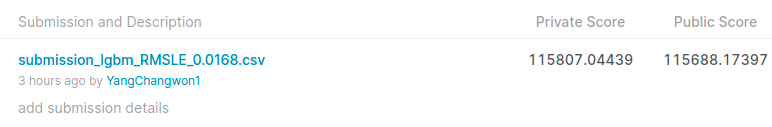

### Average Blending 결과
- ### Private Score: 115,807.04439
- ### Public Score: 115,688.17397

***

# 5. 모델링 (3) - 스테킹 앙상블

In [ ]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error

# 개별 기반 모델에서 최종 메타 모델이 사용할 학습 및 테스트용 데이터를 생성하기 위한 함수
def get_stacking_base_datasets(model, X_train_n, y_train_n, X_test_n, n_folds):
    # 지정된 n_folds값으로 KFolds 생성
    kf = KFold(n_splits=n_folds, shuffle=False, random_state=0)
    # 추후에 메타 모델이 사용할 학습 데이터 반환을 위해 넘파이 배열 초기화
    train_fold_pred = np.zeros((X_train_n.shape[0], 1))
    test_pred = np.zeros((X_test_n.shape[0], 1))
    print(model.__class__.__name__, 'model 시작')
    
    for folder_counter, (train_index, valid_index) in enumerate(kf.split(X_train_n)):
        # 입력된 학습 데이터에서 기반 모델이 학습/예측할 폴드 데이터 세트 추출
        print('\t 폴드세트: ', folder_counter, '시작')
        X_tr = X_train_n[train_index]
        y_tr = y_train_n[train_index]
        X_te = X_train_n[valid_index]
        
        # 폴드 세트 내부에서 다시 만들어진 학습 데이터로 기반 모델의 학습 수행.
        model.fit(X_tr, y_tr)
        # 폴드 세트 내부에서 다시 만들어진 검증 데이터로 기반 모델 예측 후 데이터 저장.
        train_fold_pred[valid_index, :] = model.predict(X_te).reshape(-1,1)
        # 입력된 원본 테스트 데이터를 폴드 세트 내 학습된 기반 모델에서 예측 후 데이터 저장.
        
    # 폴드 세트 내에서 원본 테스트 데이터를 예측한 데이터를 평균하여 테스트 데이터로 생성
    test_pred_mean = np.mean(test_pred, axis=1).reshape(-1,1)
    
    # train_fold_pred는 최종 메타 모델이 사용하는 학습 데이터, test_pred_mean은 테스트 데이터 
    return train_fold_pred, test_pred_mean

In [ ]:
X_train = train
X_test = test
y_train = y

In [ ]:
# get_stacking_base_datasets()는 넘파이 ndarray를 인자로 사용하므로 DataFrame을 넘파이로 변환.
X_train_n = X_train.values
X_test_n = X_test.values
y_train_n = y_train.values

# 각 개별 기반(Base) 모델이 생성한 학습용/테스트용 데이터 반환.
gboost_train, gboost_test = get_stacking_base_datasets(gboost, X_train_n, y_train_n, X_test_n, 5)
rdforest_train, rdforest_test = get_stacking_base_datasets(rdforest, X_train_n, y_train_n, X_test_n, 5)
xgb_train, xgb_test = get_stacking_base_datasets(xgboost, X_train_n, y_train_n, X_test_n, 5)
lgbm_train, lgbm_test = get_stacking_base_datasets(lightgbm, X_train_n, y_train_n, X_test_n, 5)

# 개별 모델이 반환환 학습 및 테스트용 데이터 세트를 스테킹 형태로 결합
Stack_final_X_train = np.concatenate((gboost_train, rdforest_train, xgb_train, lgbm_train), axis=1)
Stack_final_X_test = np.concatenate((gboost_test, rdforest_test, xgb_test, lgbm_test), axis=1)

In [ ]:
# 최종 메타 모델은 lightgbm 적용
meta_model_lgbm = LGBMRegressor(random_state=2020)

# 개별 모델 예측값을 기반으로 새롭게 만들어진 학습/테스트 데이터로 메타 모델 예측 및 RMSE 측정.
meta_model_lgbm.fit(Stack_final_X_train, y_train)

pred = meta_model_lgbm.predict(Stack_final_X_test)

In [ ]:
save_submission(meta_model_lgbm, Stack_final_X_train, y, Stack_final_X_test, 'lgbm', rmsle='stacking')

### submission 파일 저장

In [ ]:
sample_submission['price'] = pred
# sample_submission = sample_submission.drop(['price'], axis=1)
sample_submission.head()

### 캐글 제출용 csv 파일 만들기

In [ ]:
my_data_dir = os.getenv('HOME') + '/1.AIFFEL_Study/Exploration/E09_My_First_Kaggle/data'
submission_csv_path = join(my_data_dir, 'sample_submission_stacking.csv')
sample_submission.to_csv(submission_csv_path, index=False)
print(submission_csv_path)

### 캐글 제출 결과

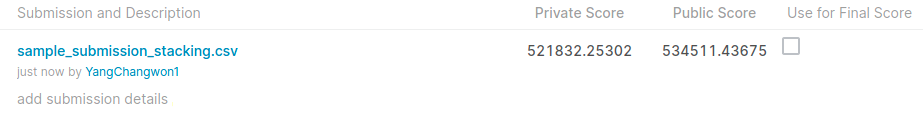

***

# 5. 모델링 (4) - Boosting  with GridSearch(Best Parameter 찾기)

In [ ]:
param_grid = {
    'n_estimators': [50, 100, 150, 200, 250],
    'max_depth': [1, 10, 100, 1000, 5000],
    'min_samples_split': [0.01, 0.05, 0.1],
    'max_features': ['auto', 'sqrt'],
}

In [ ]:
estimator = RandomForestRegressor()

In [ ]:
kf = KFold(random_state=30,
           n_splits=10,
           shuffle=True,
          )

In [ ]:
# define grid_search
grid_search = GridSearchCV(estimator=estimator, 
                           param_grid=param_grid, 
                           cv=kf, 
                           n_jobs=-1, 
                           verbose=2
                          )

# fit with (x_train, y_train)
grid_search.fit(train, y)

In [ ]:
grid_search.best_params_

### param_grid 재설정

In [ ]:
param_grid={'max_depth': 100,
 'max_features': 'auto',
 'min_samples_split': 0.01,
 'n_estimators': 200}

In [ ]:
model = LGBMRegressor(max_depth=100, n_estimators=200, min_samples_split=0.01, random_state=random_state)

### 캐글 제출용 csv 파일 만들기

In [ ]:
save_submission(model, train, y, test, 'lgbm', rmsle='grid_search_best')

### 캐글 제출 결과

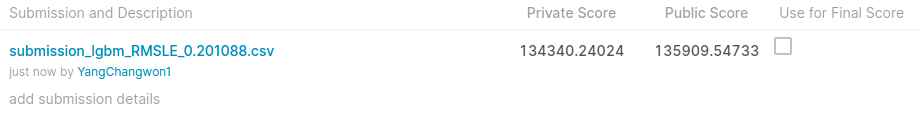

#  5. 모델링 (5) - Boosting  with RandomSearch

In [ ]:
def my_RandomSearch(model, train, y, param_distributions, verbose=2, n_jobs=5):
    # GridSearchCV 모델로 초기화
    random_model = RandomizedSearchCV(model, param_distributions=param_distributions, scoring='neg_mean_squared_error', \
                              cv=5, n_iter=10, verbose=verbose, n_jobs=n_jobs)

    # 모델 fitting
    random_model.fit(train, y)

    # 결과값 저장
    params = random_model.cv_results_['params']
    score = random_model.cv_results_['mean_test_score']

    # 데이터 프레임 생성
    results = pd.DataFrame(params)
    results['score'] = score

    # RMSLE 값 계산 후 정렬
    results['RMSLE'] = np.sqrt(-1 * results['score'])
    results = results.sort_values('RMSLE')

    return results

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
param_distributions = { 
                'n_estimators': randint(low=1, high=200), 
                'max_features': randint(low=1, high=8), 
                }

model = model = LGBMRegressor(random_state=random_state)
my_RandomSearch(model, train, y, param_distributions)

### 최적 파라미터 탐색결과
max_features = 4  
n_estimators = 170

In [ ]:
model = LGBMRegressor(max_features=4, n_estimators=170, random_state=random_state)
save_submission(model, train, y, test, 'lgbm', rmsle='randomsearch')

### 캐글 제출 결과

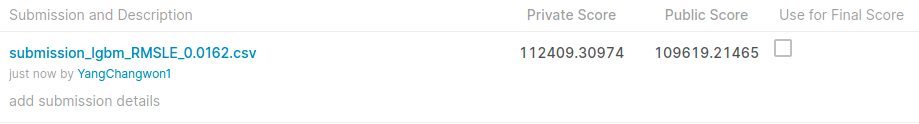

#  5. 모델링 (6) - Boosting  with RandomSearch 2nd

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
param_distributions = { 
                'n_estimators': randint(low=1, high=200),
                'max_depth' : randint(low=1, high=50), 
                }

model = model = LGBMRegressor(random_state=random_state)
my_RandomSearch(model, train, y, param_distributions)

### 최적 파라미터 탐색결과
max_depth = 45   
n_estimators = 194

In [ ]:
model = LGBMRegressor(max_depth=45, n_estimators=194, random_state=random_state)
save_submission(model, train, y, test, 'lgbm', rmsle='randomsearch_2')

### 캐글 제출 결과

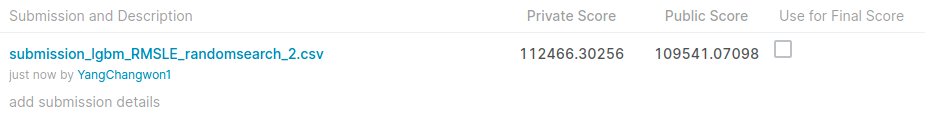

***

#  5. 모델링 (7) - 데이터 로그 변환 & Ligth GBM사용
### train data 중 편향된 컬럼은 로그변환

In [ ]:
fig, ax = plt.subplots(9, 2, figsize=(12, 50))   # 가로스크롤 때문에 그래프 확인이 불편하다면 figsize의 x값을 조절해 보세요. 

# id 변수(count==0인 경우)는 제외하고 분포를 확인합니다.
count = 1
columns = train.columns
for row in range(9):
    for col in range(2):
        sns.kdeplot(train[columns[count]], ax=ax[row][col])
        ax[row][col].set_title(columns[count], fontsize=15)
        count += 1
        if count == 19 :
            break

In [ ]:
skew_columns = ['bedrooms', 'sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement']

for c in skew_columns:
    train[c] = np.log1p(train[c].values)

In [ ]:
model = LGBMRegressor(max_depth=10, n_estimators=100, random_state=random_state)

In [ ]:
save_submission(model, train, y, test, 'lgbm', rmsle='data_log_ver1')

### 캐글 제출 결과

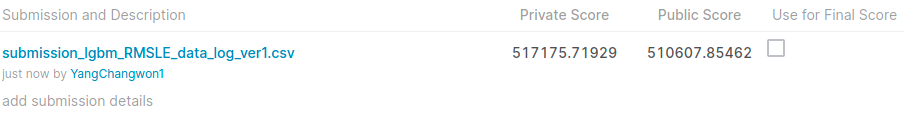

### train data 원상복구

In [ ]:
# train = pd.read_csv(train_data_path)
# train['date'] = train['date'].apply(lambda i: i[:6]).astype(int)
# del train['price']
# del train['id']